## Exploratory Data Analysis 

In [1]:
#Attribute Information:
# age - Age of patients
# sex - Sex of patients which has 1 denotes male and 0 denotes female.
# cp -  Chest Pain type (4 values) has values between 0-3.
# trestbps - resting blood pressure is normal pressure with no exercise.
# chol - serum cholestoral in mg/dl
# fbs - fasting blood sugar > 120 mg/dl
# restecg- resting electrocardiographic results (values 0,1,2)
# thalach - maximum heart rate achieved
# exang - exercise induced angina
# oldpeak - ST depression induced by exercise relative to rest
# slope - the slope of the peak exercise ST segment
# ca - number of major vessels (0-3) colored by flourosopy
# thal -  3 = normal; 6 = fixed defect; 7 = reversable defect
# target - Heart attack prediction where 1 denotes Heart attack occured and 0 where it din't take occur.

In [2]:
#Loading The Libraries

#For uploading and accessing the data
import pandas as pd
import numpy as np

#For visualizations
import matplotlib.pyplot as plt
import seaborn as sns


In [3]:
data = pd.read_csv("heart.csv")

In [4]:
data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [5]:
data.shape

(303, 14)

In [6]:
data.rename(columns ={'age':'Age','sex':'Sex','cp':'Chest_pain','trestbps':'Resting_blood_pressure','chol':'Cholesterol','fbs':'Fasting_blood_sugar',
                    'restecg':'ECG_results','thalach':'Maximum_heart_rate','exang':'Exercise_induced_angina','oldpeak':'ST_depression','ca':'Major_vessels',
                   'thal':'Thalassemia_types','target':'Heart_attack','slope':'ST_slope'}, inplace = True)

Renaming the column headers for better understanding of visualizations.

In [7]:
data2 = data.copy()
data1 = data.copy()
data.head()
#1 = Male and 0 = Female in 'Sex' column.

,Age,Sex,Chest_pain,Resting_blood_pressure,Cholesterol,Fasting_blood_sugar,ECG_results,Maximum_heart_rate,Exercise_induced_angina,ST_depression,ST_slope,Major_vessels,Thalassemia_types,Heart_attack
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [8]:
data.isnull().sum()

Age                        0
Sex                        0
Chest_pain                 0
Resting_blood_pressure     0
Cholesterol                0
Fasting_blood_sugar        0
ECG_results                0
Maximum_heart_rate         0
Exercise_induced_angina    0
ST_depression              0
ST_slope                   0
Major_vessels              0
Thalassemia_types          0
Heart_attack               0
dtype: int64

No missing values in the dataset.

In [9]:
data1['Sex'].replace({1:'Male',0:'Female'},inplace = True)
data1['Heart_attack'].replace({1:'Heart_attack - Yes',0:'Heart_attack - No'},inplace = True)

Replacing the values for Sex and Heart_Attack colummns as these will make the understanding of visualizations better instead of numeric values.

# Analysis of data

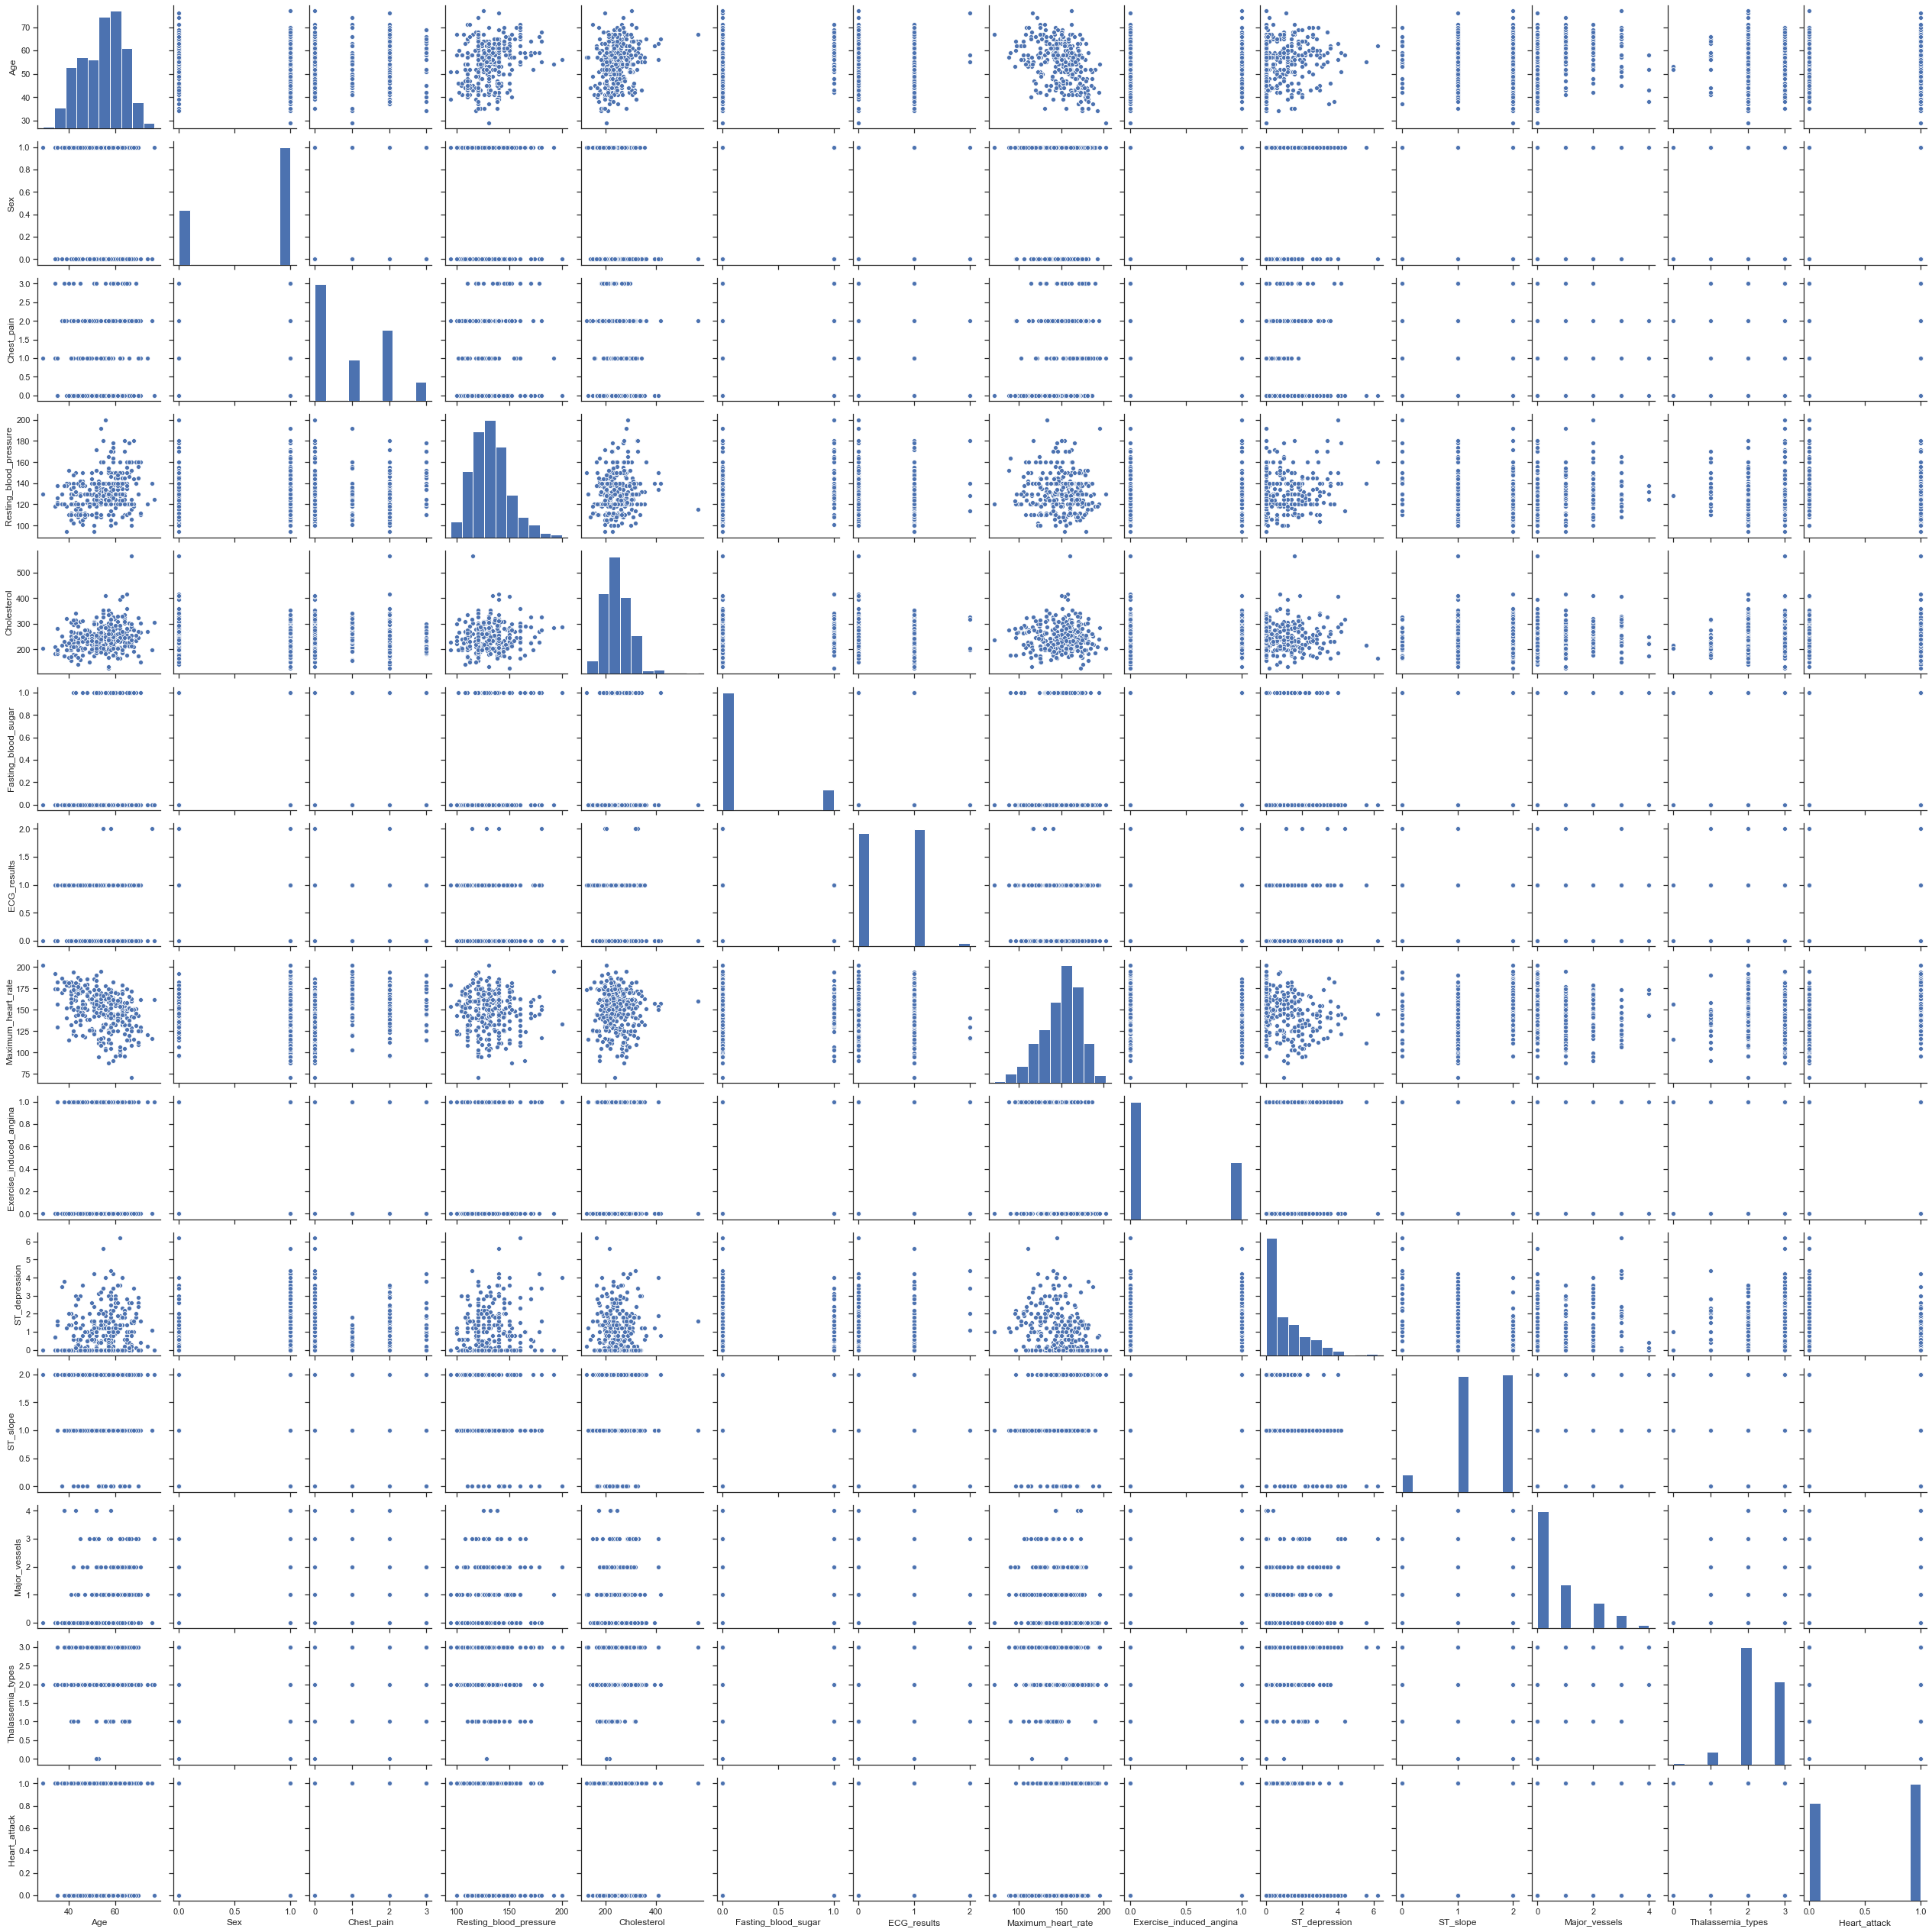

In [10]:
# Checking relatoionship between all variables using pair plot
sns.set(style="ticks", color_codes=True)
sns.pairplot(data)

This shows overall relationship between all the columns in the DataFrame.

### Analysis of data by GroupBy and Cmap

In [11]:
map1= data1.groupby(['Sex','Age'])['Heart_attack'].count().reset_index().sort_values(by='Heart_attack',ascending=False)
map1.head(20).style.background_gradient(cmap='Purples')

,Sex,Age,Heart_attack
59,Male,58,13
58,Male,57,13
60,Male,59,13
53,Male,52,12
55,Male,54,11
45,Male,44,9
52,Male,51,8
57,Male,56,8
61,Male,60,7
65,Male,64,7


This shows the total number of heart attacks that have occured for a particular age in case of males and females. In the top 20 count of heart attack, males have witnessed more heart attacks for their ages.

In [12]:
map2= data1.groupby(['Sex','Chest_pain'])['Heart_attack'].count().reset_index().sort_values(by='Heart_attack',ascending=False)
map2.head(10).style.background_gradient(cmap='Blues')

,Sex,Chest_pain,Heart_attack
4,Male,0,104
6,Male,2,52
0,Female,0,39
2,Female,2,35
5,Male,1,32
7,Male,3,19
1,Female,1,18
3,Female,3,4


The Males having chest pain type 0 suffered the most heart attacks and type 2 the second highest. This trend is same for females.

In [13]:
map3= data1.groupby(['Sex','Resting_blood_pressure'])['Heart_attack'].count().reset_index().sort_values(by='Heart_attack',ascending=False)
map3.head(10).style.background_gradient(cmap='Greens')

,Sex,Resting_blood_pressure,Heart_attack
46,Male,120,27
54,Male,130,24
60,Male,140,22
40,Male,110,16
15,Female,130,12
50,Male,125,11
21,Female,140,10
66,Male,150,10
10,Female,120,10
52,Male,128,9


The resting blood pressure and the cases of heart attack for such pressure in case of males and females.

In [14]:
map4= data1.groupby(['Sex','Cholesterol'])['Heart_attack'].count().reset_index().sort_values(by='Heart_attack',ascending=False)
map4.head(10).style.background_gradient(cmap='Reds')

,Sex,Cholesterol,Heart_attack
115,Male,212,5
109,Male,204,4
135,Male,234,4
134,Male,233,4
172,Male,282,4
150,Male,254,4
48,Female,269,4
144,Male,246,3
143,Male,245,3
141,Male,243,3


Generally males having high cholesterol had higher cases of heart attacks than females at the same Cholesterol.

In [15]:
map5= data1.groupby(['Sex','Fasting_blood_sugar'])['Heart_attack'].count().reset_index().sort_values(by='Heart_attack',ascending=False)
map5.head(10).style.background_gradient(cmap='Reds')

,Sex,Fasting_blood_sugar,Heart_attack
2,Male,0,174
0,Female,0,84
3,Male,1,33
1,Female,1,12


This shows relation of Fasting blood sugar with heart attack in case of Male and Females.

In [16]:
map6= data1.groupby(['Sex','ECG_results'])['Heart_attack'].count().reset_index().sort_values(by='Heart_attack',ascending=False)
map6.head(10).style.background_gradient(cmap='Greys')

,Sex,ECG_results,Heart_attack
3,Male,0,103
4,Male,1,103
1,Female,1,49
0,Female,0,44
2,Female,2,3
5,Male,2,1


This shows the lower the ECG Results, the more cases of heart attack occurred.

In [17]:
map7= data1.groupby(['Sex','Maximum_heart_rate'])['Heart_attack'].count().reset_index().sort_values(by='Heart_attack',ascending=False)
map7.head(10).style.background_gradient(cmap='Oranges')

,Sex,Maximum_heart_rate,Heart_attack
86,Male,144,7
77,Male,132,7
103,Male,162,7
113,Male,173,7
82,Male,140,6
42,Female,172,6
91,Male,150,6
70,Male,125,6
97,Male,156,6
34,Female,163,5


The maximum heart rate varied for heart attack and were higher for males resulting in heart attack

In [18]:
map8= data1.groupby(['Sex','Exercise_induced_angina'])['Heart_attack'].count().reset_index().sort_values(by='Heart_attack',ascending=False)
map8.head(10).style.background_gradient(cmap='Purples')

,Sex,Exercise_induced_angina,Heart_attack
2,Male,0,130
3,Male,1,77
0,Female,0,74
1,Female,1,22


Exercise induced chest pain was higher in males and more resulted in Heart attacks.

In [19]:
map9= data1.groupby(['Sex','ST_depression'])['Heart_attack'].count().reset_index().sort_values(by='Heart_attack',ascending=False)
map9.head(10).style.background_gradient(cmap='Blues')

,Sex,ST_depression,Heart_attack
27,Male,0.000000,64
0,Female,0.000000,35
37,Male,1.200000,13
34,Male,0.800000,10
36,Male,1.000000,9
41,Male,1.800000,8
38,Male,1.400000,8
33,Male,0.600000,8
43,Male,2.000000,7
40,Male,1.600000,7


The lower the depression, the higher the cases were for heart attack.

In [20]:
map10= data1.groupby(['Sex','ST_slope'])['Heart_attack'].count().reset_index().sort_values(by='Heart_attack',ascending=False)
map10.head(10).style.background_gradient(cmap='Greens')

,Sex,ST_slope,Heart_attack
5,Male,2,96
4,Male,1,95
2,Female,2,46
1,Female,1,45
3,Male,0,16
0,Female,0,5


The higher the slope value, the higher were the cases for Heart attack.

In [21]:
map11= data1.groupby(['Sex','Major_vessels'])['Heart_attack'].count().reset_index().sort_values(by='Heart_attack',ascending=False)
map11.head(10).style.background_gradient(cmap='Reds')

,Sex,Major_vessels,Heart_attack
4,Male,0,111
0,Female,0,64
5,Male,1,50
6,Male,2,25
7,Male,3,16
1,Female,1,15
2,Female,2,13
8,Male,4,5
3,Female,3,4


The lower the number of vessels blocked, the higher were the heart attack cases. This means that 0 represents that all 4 major blood vessels were blocked and 4 represented all vessels were free for flow.

In [22]:
map12= data1.groupby(['Sex','Thalassemia_types'])['Heart_attack'].count().reset_index().sort_values(by='Heart_attack',ascending=False)
map12.head(10).style.background_gradient(cmap='Greys')

,Sex,Thalassemia_types,Heart_attack
7,Male,3,102
6,Male,2,87
2,Female,2,79
5,Male,1,17
3,Female,3,15
0,Female,0,1
1,Female,1,1
4,Male,0,1


The higher the Thalassemia type, the higher were the cases of heart attack.

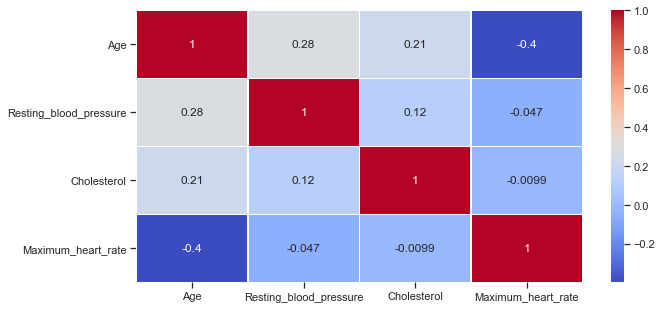

In [23]:
data2.drop(['Sex','Fasting_blood_sugar','Heart_attack','Chest_pain','ECG_results','Exercise_induced_angina','ST_slope','ST_depression','Major_vessels','Thalassemia_types'],axis = 'columns',inplace = True)
plt.figure(figsize=(10,5))
sns.heatmap(data2.corr(), annot=True, linewidth=0.5, cmap='coolwarm')

# Univariate Data Analysis

I have dropped categorical variables for heart attack heatmap and only continuous variables are shown.

1. This shows age has some dependency on Resting Blood Pressure and Cholesterol. There is almost no dependecy of Maximum heart rate on Age.
1. Resting blood pressure and Cholesterol also has a low dependency. Maximum heart rate and Resting blood pressure has almost no dependency.

<h1><font color='turquoise'><strong></strong></font></h1>

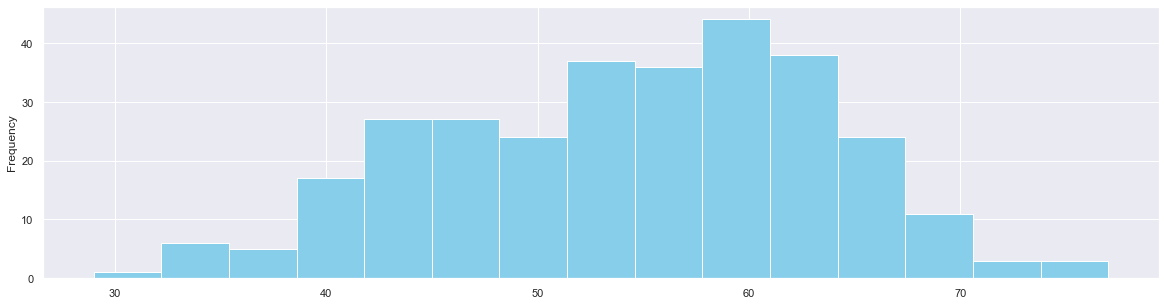

In [24]:
sns.set(rc={'figure.figsize':(20,5)})
data['Age'].plot.hist(bins = 15, color = 'skyblue')

The span of Ages that were taken for the case study.

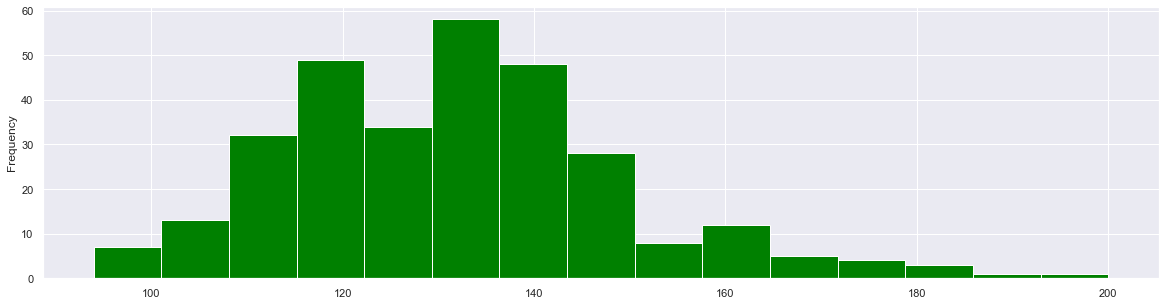

In [25]:
data['Resting_blood_pressure'].plot.hist(bins = 15, color = 'green')

The span of Resting Blood pressure in the case study and they have an average value of 120-140.

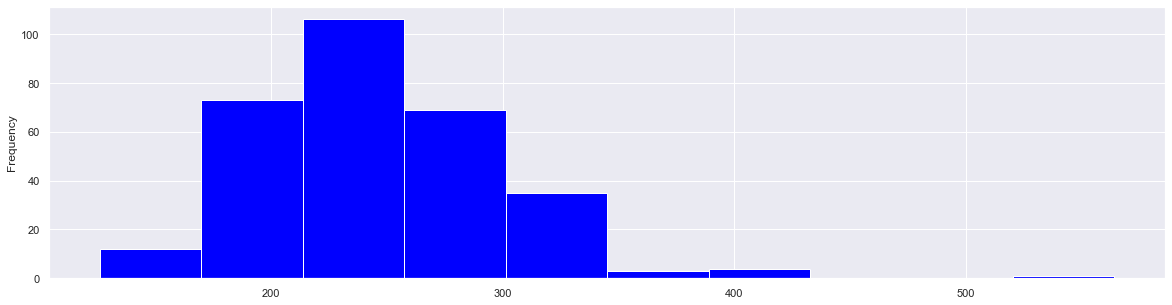

In [26]:
data['Cholesterol'].plot.hist(bins = 10, color = 'blue')

The cholesterol lies between 200 and 300.

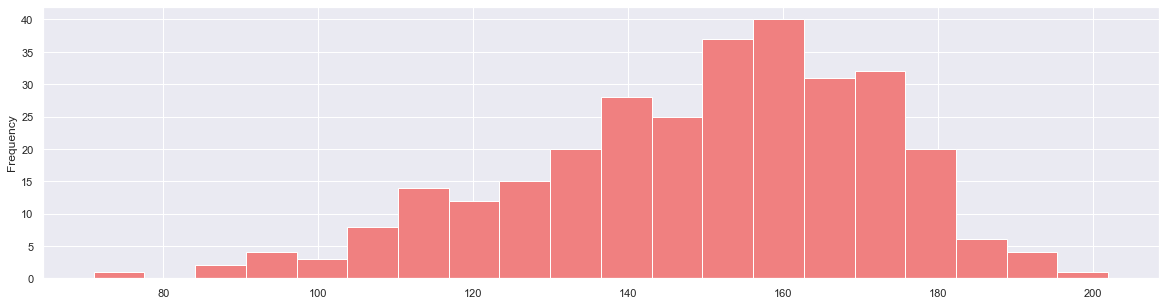

In [27]:
data['Maximum_heart_rate'].plot.hist(bins = 20, color = 'lightcoral')

The maximum heart rate recorded for the patients. The span is showed and it had the maximum average at 160.

# Bivariate Data Analysis

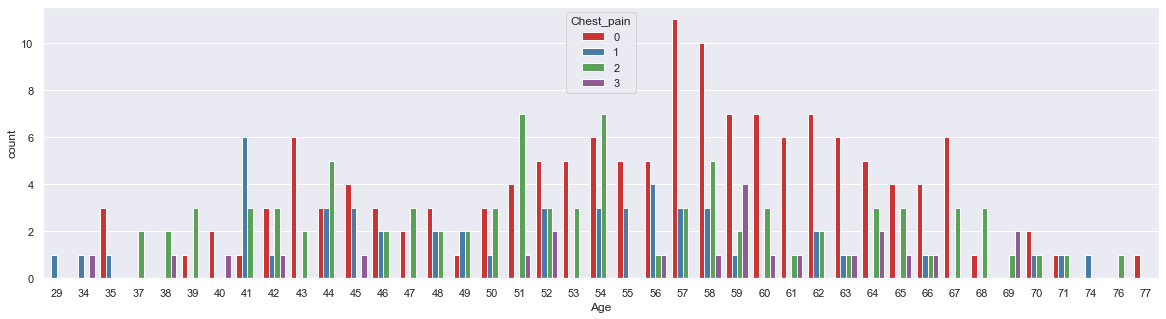

In [28]:
sns.countplot(x = 'Age',hue = 'Chest_pain', data = data,palette="Set1")

The dependence of Chest pain on Age.

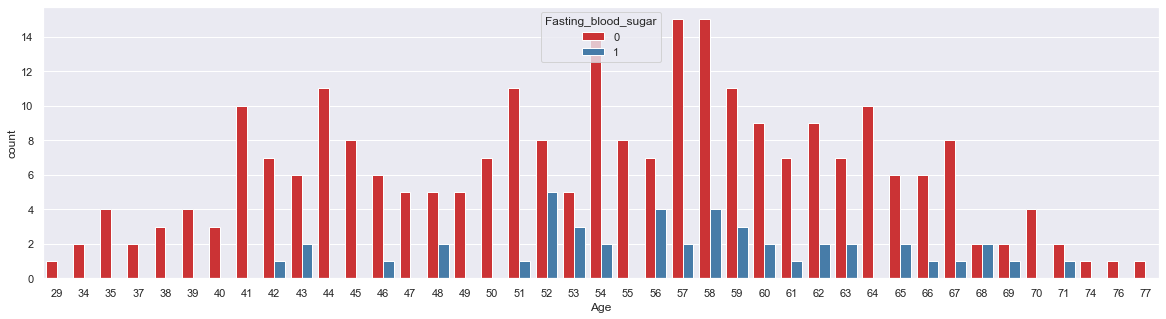

In [29]:
sns.countplot(x = 'Age',hue = 'Fasting_blood_sugar', data = data,palette="Set1")

The dependence of result of Fasting blood sugar on age.

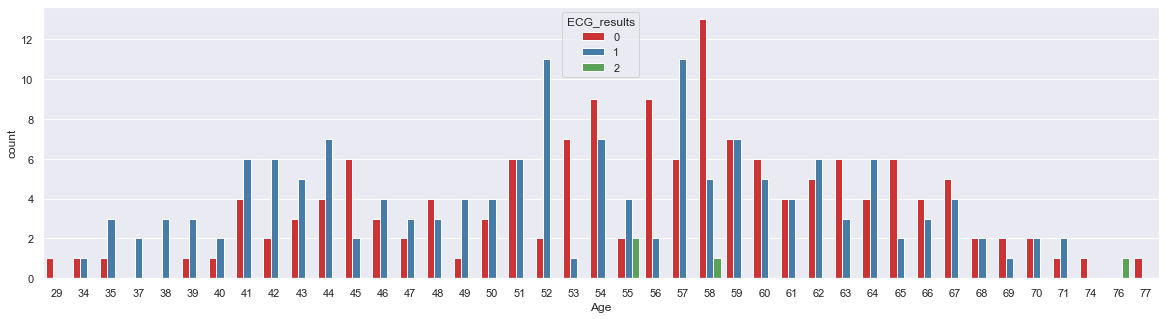

In [30]:
sns.countplot(x = 'Age',hue = 'ECG_results', data = data,palette="Set1")

The dependence of result of ECG on age.

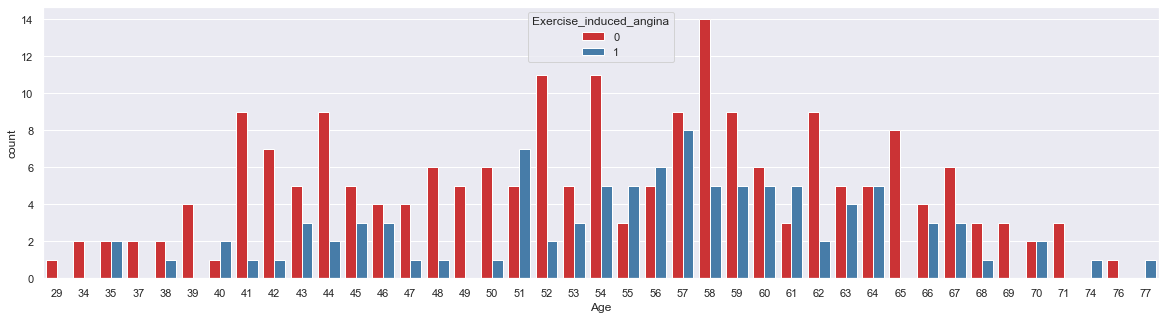

In [31]:
sns.countplot(x = 'Age',hue = 'Exercise_induced_angina', data = data, palette="Set1")

The dependence of result of Exercise Induced Angina on age.

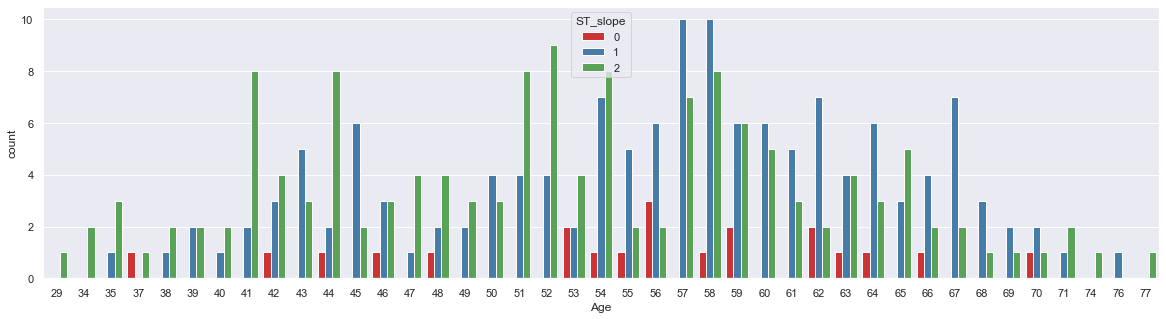

In [32]:
sns.countplot(x = 'Age',hue = 'ST_slope', data = data, palette="Set1")

The dependence of result of ST Slope on age.

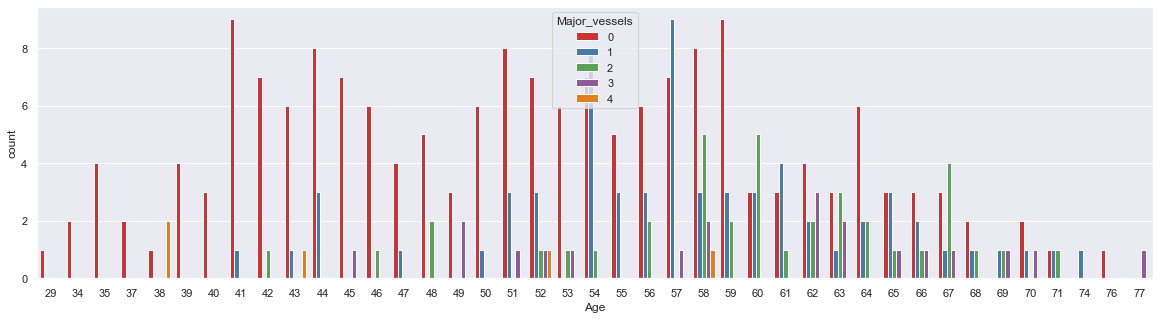

In [33]:
sns.countplot(x = 'Age',hue = 'Major_vessels', data = data, palette='Set1')

The dependence of result of Major vessels being blocked with age.

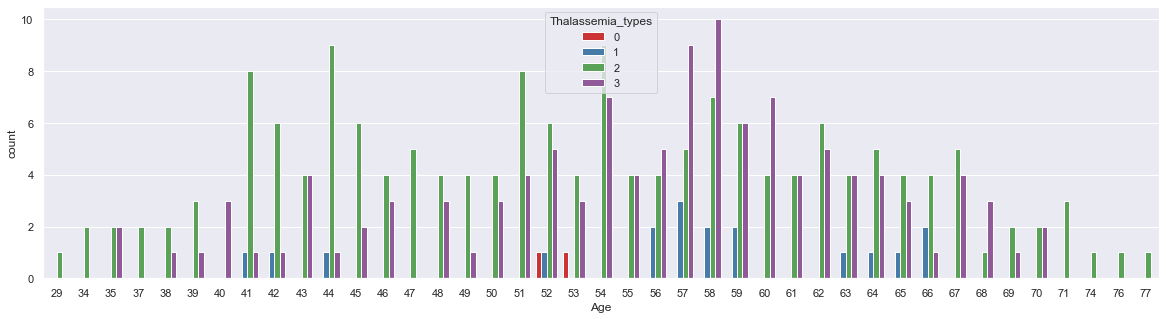

In [34]:
sns.countplot(x = 'Age',hue = 'Thalassemia_types', data = data , palette="Set1")

The dependence of result of Thalassemia on age.

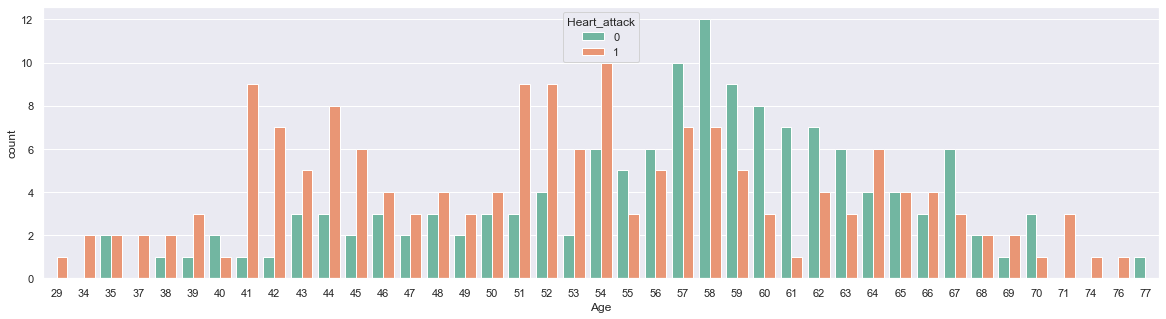

In [35]:
sns.countplot(x = 'Age',hue = 'Heart_attack', data = data, palette = 'Set2')

The dependence of Heart Attack on Age.

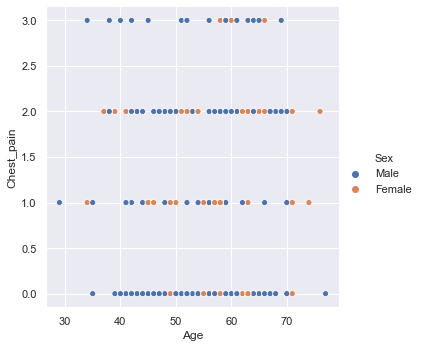

In [36]:
sns.relplot(x ='Age', y ='Chest_pain', hue = 'Sex', data = data1)

Relationship between Chest Pain, Age and Sex.

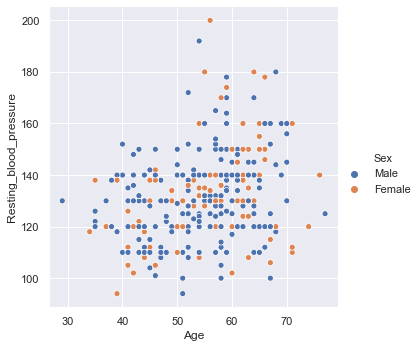

In [37]:
sns.relplot(x ='Age', y ='Resting_blood_pressure', hue = 'Sex', data = data1)

Relationship between Rising Blood Pressure, Age and Sex.

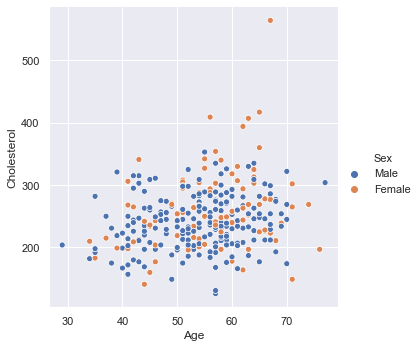

In [38]:
sns.relplot(x ='Age', y ='Cholesterol', hue = 'Sex', data = data1)

Relationship between Cholesterol, Age and Sex.

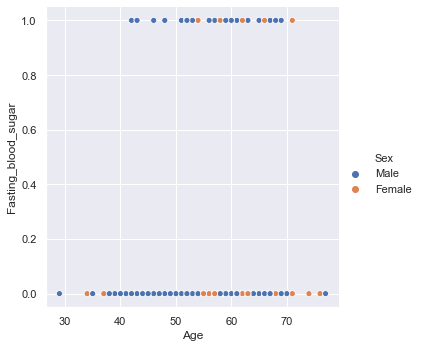

In [39]:
sns.relplot(x ='Age', y ='Fasting_blood_sugar', hue = 'Sex', data = data1)

Relationship between Fasting Blood Sugar, Age and Sex.

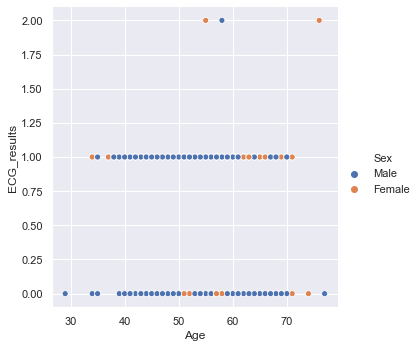

In [40]:
sns.relplot(x ='Age', y ='ECG_results', hue = 'Sex', data = data1)

Relationship between ECG Results, Age and Sex.

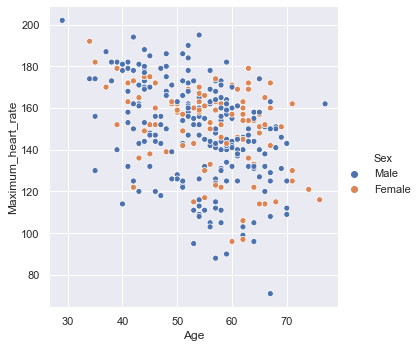

In [41]:
sns.relplot(x ='Age', y ='Maximum_heart_rate', hue = 'Sex', data = data1)

Relationship between Maximum Heart Rate, Age and Sex.

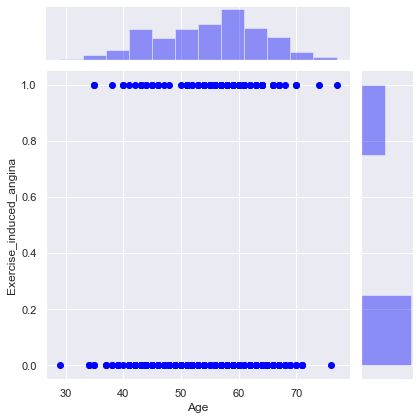

In [42]:
sns.jointplot(x =data['Age'], y =data['Exercise_induced_angina'], data = data, color = 'blue')

Relationship between Exercise Induced Angina and Age. The Age peaks at about 60 and Exercise Induced Angina problem is more at value 0.

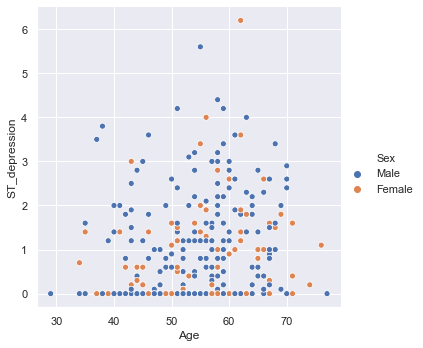

In [43]:
sns.relplot(x ='Age', y ='ST_depression', hue = 'Sex', data = data1)

Relationship between ST_depression, Age and Sex.

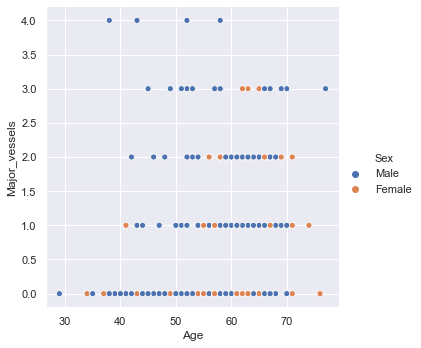

In [44]:
sns.relplot(x ='Age', y ='Major_vessels', hue = 'Sex', data = data1)

Relationship between Major_vessels, Age and Sex.

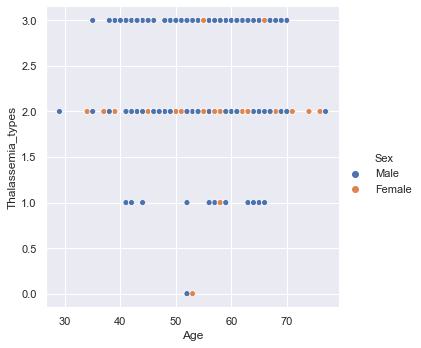

In [45]:
sns.relplot(x ='Age', y ='Thalassemia_types', hue = 'Sex', data = data1)

Relationship between Thalassemia type, Age and Sex.

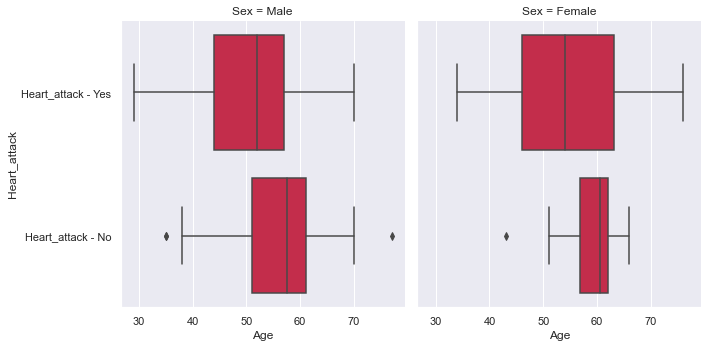

In [46]:
sns.catplot(x ='Age', y ='Heart_attack', col = 'Sex', data = data1, color = 'crimson', kind = 'box')

Relationship between Heart Attack, Age and Sex.

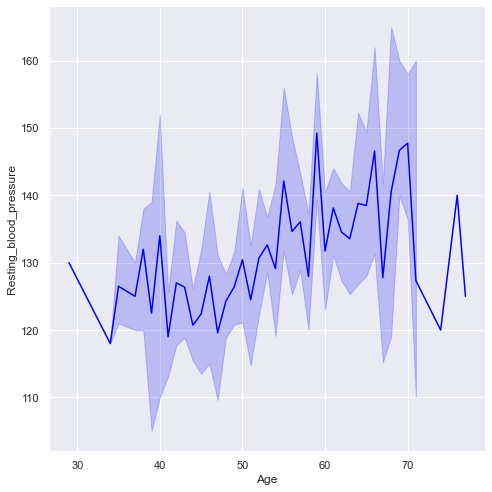

In [47]:
sns.relplot(x = 'Age', y = 'Resting_blood_pressure', kind = 'line', data=data, aspect = 1,height = 7, color = 'blue')

The shaded lines above and below the dark green lines specifies that multiple values are present on that instance. They all have regarded and their mean is taken for plotting.

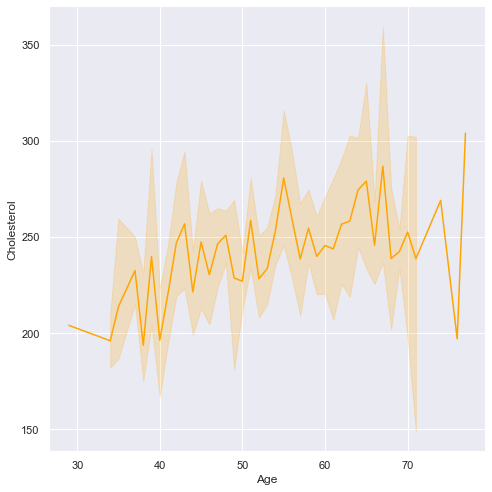

In [48]:
sns.relplot(x = 'Age', y = 'Cholesterol', kind = 'line', data=data, aspect = 1,height = 7, color = 'orange')

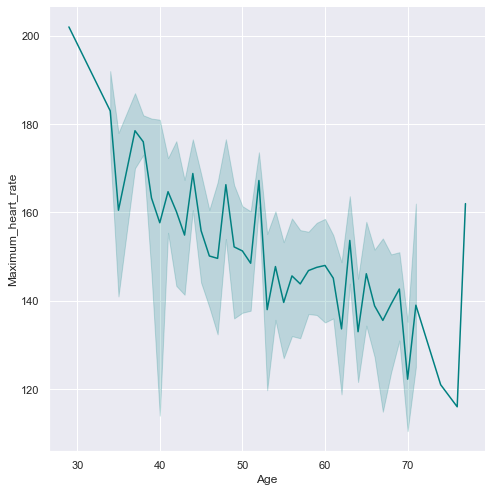

In [49]:
sns.relplot(x = 'Age', y = 'Maximum_heart_rate', kind = 'line', data=data, aspect = 1,height = 7, color = 'teal')

#### The overall graphical analysis shows that females tend to suffer less from heart attack and that men have a higher chances of getting struck by a heart attack.

#### Men don't have a defined age span that they are safe from heart attack. Men below 30 also suffered from heart attack which wasn't the case with women. This shows men have to be more careful with their health conditions and situations.

#### Age was not such a huge critera for suffering from heart attack and rest of the parameters had very little relation amongst themselves. The tests taken showed various results where the patterns showed that the heart attack conditions could have been diagonsed a bit earlier.
